In [1]:
import numpy as np
import pandas as pd
import xlrd

import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq, ifft, rfft

def fft_from_data_frame(data_frame):
    fs= 114e3
    signal_set = []
    for row in data_frame.values:
        fft_data = fft(row, n=row.size)/row.size
        freq = fftfreq(row.size, d=1/fs)
        cut_high_signal = np.abs(fft_data).copy()
        cut_high_signal[(freq > 50000)] = 0
        cut_high_signal[(freq < 30000)] = 0
        signal_without_0 = list(filter(lambda a: a != 0, cut_high_signal))
        signal_set.append(np.abs(signal_without_0))
    return signal_set

In [4]:
import glob

def get_fft_set(file_names):
    fft_set = []
    for files in file_names:
        data = pd.read_csv(files)
        fft_data = fft_from_data_frame(data)
        fft_set = fft_data + fft_set
    return fft_set

car_front_1 = glob.glob('./Documents/data_set/Result/67_Ford_Black_front/*_overall.csv')
car_side_1 = glob.glob('./Documents/data_set/Result/99_Fiesta_Purple_side/*_overall.csv')
car_side_2 = glob.glob('./Documents/data_set/Result/129_Skoda_Grey_side/*_overall.csv')
car_back_1 = glob.glob('./Documents/data_set/Result/26_Ford_Black_back/*_overall.csv')
car_back_2 = glob.glob('./Documents/data_set/Result/66_Ford_Purple_back/*_overall.csv')
motorbike_1 = glob.glob('./Documents/data_set/Result/92_CBR_Honda_side/*_overall.csv')
cycle_1 = glob.glob('./Documents/data_set/Result/Cycle_side/*_overall.csv')
human_A = glob.glob('./Documents/data_set/Result/Human_A/*_overall.csv')
human_B = glob.glob('./Documents/data_set/Result/Human_B/*_overall.csv')
human_C = glob.glob('./Documents/data_set/Result/Human_C/*_overall.csv')
human_D = glob.glob('./Documents/data_set/Result/Human_C/*_overall.csv')
pillar_1 = glob.glob('./Documents/data_set/Result/Pillar_1/*_overall.csv')
pillar_2 = glob.glob('./Documents/data_set/Result/Pillar_2/*_overall.csv')
stopper_1 = glob.glob('./Documents/data_set/Result/Stopper_1/*_overall.csv')
stopper_2 = glob.glob('./Documents/data_set/Result/Stopper_2/*_overall.csv')
# ventilator_1 = glob.glob('./Documents/data_set/Result/Ventilator_1/*_overall.csv')
wall_1 = glob.glob('./Documents/data_set/Result/Wall_1/*_overall.csv')
wall_2 = glob.glob('./Documents/data_set/Result/Wall_2/*_overall.csv')

car_front_1_fft = get_fft_set(car_front_1)
car_side_1_fft = get_fft_set(car_side_1)
car_side_2_fft = get_fft_set(car_side_2)
car_back_1_fft = get_fft_set(car_back_1)
car_back_2_fft = get_fft_set(car_back_2)
motorbike_1_fft = get_fft_set(motorbike_1)
cycle_1_fft = get_fft_set(cycle_1)
human_A_fft = get_fft_set(human_A)
human_B_fft = get_fft_set(human_B)
human_C_fft = get_fft_set(human_C)
human_D_fft = get_fft_set(human_D)
pillar_1_fft = get_fft_set(pillar_1)
pillar_2_fft = get_fft_set(pillar_2)
stopper_1_fft = get_fft_set(stopper_1)
stopper_2_fft = get_fft_set(stopper_2)
# ventilator_1_fft = get_fft_set(ventilator_1)
wall_1_fft = get_fft_set(wall_1)
wall_2_fft = get_fft_set(wall_2)

In [23]:
car = car_front_1_fft + car_side_1_fft + car_side_2_fft + car_back_1_fft + car_back_2_fft
motorbike = motorbike_1_fft
cycle = cycle_1_fft
human = human_A_fft + human_B_fft + human_C_fft + human_D_fft
pillar = pillar_1_fft + pillar_2_fft
stopper = stopper_1_fft + stopper_2_fft
# ventilator = ventilator_1_fft
wall = wall_1_fft + wall_1_fft
 
print("Car:", len(car))
print("Mototrbike:", len(motorbike))
print("Cycle:", len(cycle))
print("Human:", len(human))
print("Pillar:", len(pillar))
print("Stopper:", len(stopper))
# print("Ventilator:", len(ventilator))
print("Wall:", len(wall))


Car: 11053
Mototrbike: 1268
Cycle: 445
Human: 1431
Pillar: 7816
Stopper: 2690
Wall: 3774


In [24]:
from sklearn.model_selection import train_test_split
def split(X_, index):
    y_ = [index]*len(X_)
    return train_test_split(X_, y_, test_size=0.40, random_state=42)

In [41]:
X_Human_train, X_Human_test, y_Human_train, y_Human_test = split(human, 'HUMAN')
Non_Human = car + motorbike + cycle + pillar + stopper + wall
X_Non_Human_train, X_Non_Human_test, y_Non_Human_train, y_Non_Human_test = split(Non_Human, 'NOT HUMAN')

X_Human_Non_Human_train = X_Human_train + X_Non_Human_train
y_Human_Non_Human_train = y_Human_train + y_Non_Human_train

X_Human_Non_Human_test = X_Human_test + X_Non_Human_test
y_Human_Non_Human_test = y_Human_test + y_Non_Human_test

from sklearn import preprocessing
normalized_X_Human_Non_Human_train = preprocessing.normalize(X_Human_Non_Human_train)
normalized_X_Human_Non_Human_train = preprocessing.scale(normalized_X_Human_Non_Human_train)

normalized_X_Human_Non_Human_test = preprocessing.normalize(X_Human_Non_Human_test)
normalized_X_Human_Non_Human_test = preprocessing.scale(normalized_X_Human_Non_Human_test)

In [42]:
print('X train data : ',np.array(X_Human_Non_Human_train).shape)
print('y train data : ',np.array(y_Human_Non_Human_train).shape)
print('X test data : ',np.array(X_Human_Non_Human_test).shape)
print('y test data : ',np.array(y_Hunam_Non_Human_test).shape)

X train data :  (17085, 90)
y train data :  (17085,)
X test data :  (11392, 90)
y test data :  (11392,)


In [66]:
from sklearn.metrics import confusion_matrix

def create_confusion_matrix(cm, y_test):
    confusion_matrix(result, y_Human_Non_Human_test)
    import seaborn as sns
    import matplotlib.pyplot as plt     
    sum = np.sum(cm, axis=1)
 
    from sklearn.metrics import precision_score, recall_score
    precision_CLASS_A = round(precision_score(y_test, result, average='binary',pos_label=labels[0]),2)
    precision_CLASS_B = round(precision_score(y_test, result, average='binary',pos_label=labels[1]),2)
    recall_CLASS_A = round(recall_score(y_test, result, average='binary',pos_label=labels[0]),2)
    recall_CLASS_B = round(recall_score(y_test, result, average='binary',pos_label=labels[1]),2)
    cm_new = np.append(cm[0], precision_CLASS_A)
    cm_new2 = np.append(cm[1], precision_CLASS_B)
    cm_new3 = np.array([recall_CLASS_A, recall_CLASS_B, score])
    cm = np.array([cm_new,cm_new2,cm_new3])


    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(cm, annot=True, ax = ax,linewidths=.5,fmt='g',cmap="Reds"); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    counter = 0
    for i in range(0,2):
        for j in range(0,2):
            percentage = cm[i][j]/sum[i]
            if (counter+1)/3 == 1:
                counter += 1
            t = ax.texts[counter]
            t.set_text(str(cm[i][j]) + '\n' + str(round(percentage*100,2)) + " %")
            counter = counter + 1

    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels);

[[  375   140]
 [  198 10679]]
0.9703300561797753


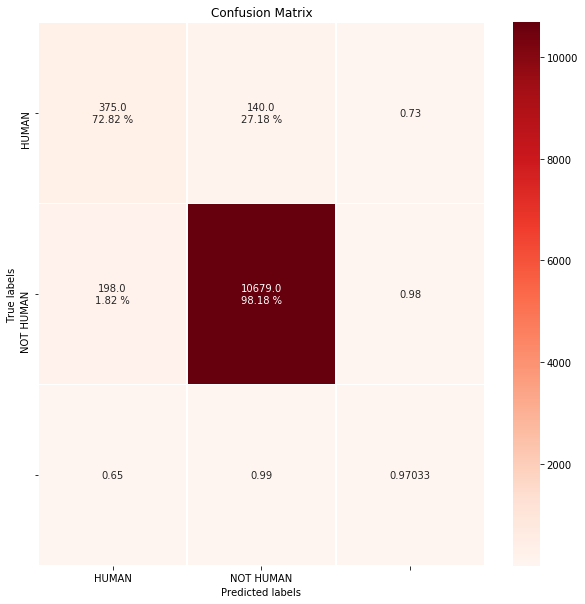

In [73]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(30,), random_state=12,activation="relu")
clf.fit(normalized_X_Human_Non_Human_train,y_Human_Non_Human_train)
result = clf.predict(normalized_X_Human_Non_Human_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(result, y_Human_Non_Human_test)
score = accuracy_score(result, y_Human_Non_Human_test)
labels = ['HUMAN', 'NOT HUMAN']
create_confusion_matrix(cm, y_Human_Non_Human_test)
print(cm)
print(score)

In [45]:
from sklearn.model_selection import cross_val_score

for i in range(13,50):
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(i,), random_state=12)
    scores = cross_val_score(clf, normalized_X_Human_Non_Human_train, y_Human_Non_Human_train, cv=4, scoring="accuracy")
    print("hidden layer", i, "score average", scores.mean())

hidden layer 13 score average 0.9680422438119285
hidden layer 14 score average 0.9671061883250809
hidden layer 15 score average 0.9673402296357894
hidden layer 16 score average 0.9683939155648449
hidden layer 17 score average 0.9678083258884607
hidden layer 18 score average 0.9680426412489946
hidden layer 19 score average 0.9685695459424403
hidden layer 20 score average 0.9685692032550126
hidden layer 21 score average 0.9693302725693943
hidden layer 22 score average 0.9687449295712254
hidden layer 23 score average 0.9702667666052743
hidden layer 24 score average 0.9696228070371483
hidden layer 25 score average 0.968744586922304
hidden layer 26 score average 0.9697399989880835
hidden layer 27 score average 0.9686276553642692
hidden layer 28 score average 0.970324985673988
hidden layer 29 score average 0.9690374639748021
hidden layer 30 score average 0.9705007393553934
hidden layer 31 score average 0.9700911088945751
hidden layer 32 score average 0.9710860275589998
hidden layer 33 score 

[[  283    59]
 [  290 10760]]
0.9693644662921348


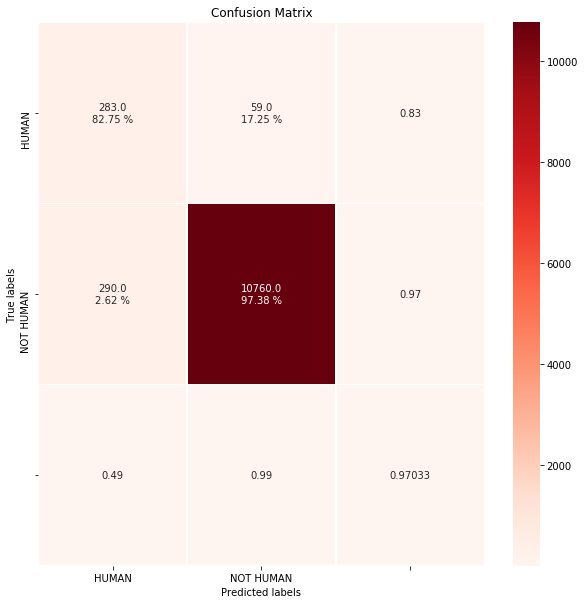

In [74]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=2, random_state=0, n_estimators=100)
clf.fit(normalized_X_Human_Non_Human_train, y_Human_Non_Human_train)
result = clf.predict(normalized_X_Human_Non_Human_test)

# from sklearn.metrics import accuracy_score
cm = confusion_matrix(result, y_Human_Non_Human_test)
print(cm)
print(accuracy_score(result, y_Human_Non_Human_test))
labels = ['HUMAN', 'NOT HUMAN']
create_confusion_matrix(cm, y_Human_Non_Human_test)

[[  207    55]
 [  366 10764]]
0.9630442415730337


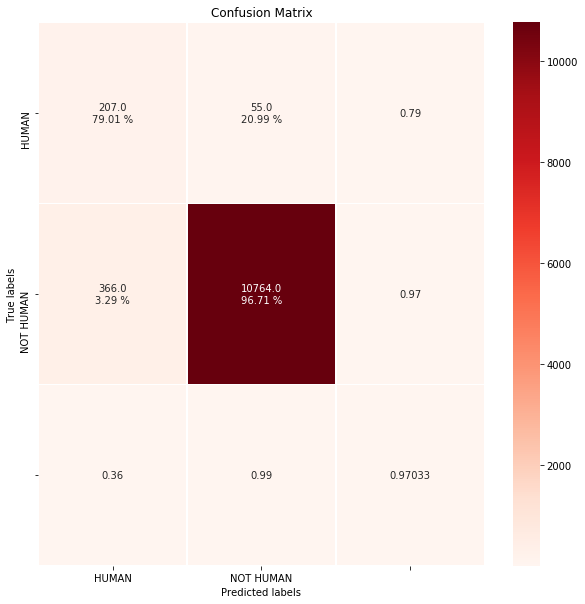

In [75]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(normalized_X_Human_Non_Human_train, y_Human_Non_Human_train)
# print('\nThe number of neighbors used to predict the target : ',clf.n_neighbors)
result = clf.predict(normalized_X_Human_Non_Human_test)

cm = confusion_matrix(result, y_Human_Non_Human_test)
print(cm)
print(accuracy_score(result, y_Human_Non_Human_test))
labels = ['HUMAN', 'NOT HUMAN']
create_confusion_matrix(cm, y_Human_Non_Human_test)

[[  223    41]
 [  350 10778]]
0.9656776685393258


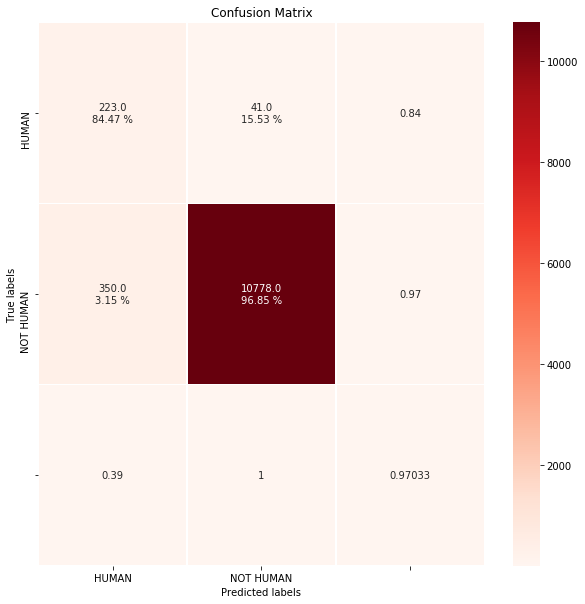

In [76]:
from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(normalized_X_Human_Non_Human_train, y_Human_Non_Human_train)
result = clf.predict(normalized_X_Human_Non_Human_test)

cm = confusion_matrix(result, y_Human_Non_Human_test)
print(cm)
print(accuracy_score(result, y_Human_Non_Human_test))
labels = ['HUMAN', 'NOT HUMAN']
create_confusion_matrix(cm, y_Human_Non_Human_test)

[[ 393 1658]
 [ 180 9161]]
0.8386587078651685


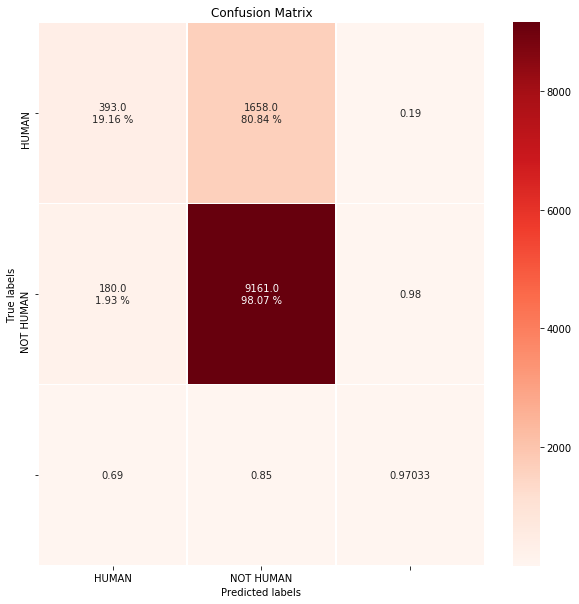

In [77]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(normalized_X_Human_Non_Human_train, y_Human_Non_Human_train)
result = gnb.predict(normalized_X_Human_Non_Human_test)

cm = confusion_matrix(result, y_Human_Non_Human_test)
print(cm)
print(accuracy_score(result, y_Human_Non_Human_test))
labels = ['HUMAN', 'NOT HUMAN']
create_confusion_matrix(cm, y_Human_Non_Human_test)